学习R语言决策树。

In [3]:
rm(list = ls())
library(rpart)
library(rpart.plot)

load(file = "data/pimadiabetes.rdata")

dim(pimadiabetes)

[1] 768   9

In [4]:
str(pimadiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 ...
 $ triceps : num  35 29 22.3 23 35 ...
 $ insulin : num  190.5 60.8 229.9 94 168 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "pos","neg": 2 1 2 1 2 1 2 1 2 2 ...


In [5]:
# 设置随机种子以保证结果可复现
set.seed(123)

# 随机抽取70%样本作为训练集
ind <- sample(seq_len(nrow(pimadiabetes)), size = 0.7 * nrow(pimadiabetes))

train <- pimadiabetes[ind, ]
test <- pimadiabetes[-ind, ]

dim(train)
dim(test)


[1] 537   9

[1] 231   9

# 建立模型

In [6]:
# 决策树计算过程中有随机性，需设置种子数保证结果能复现
set.seed(123)
treefit <- rpart(diabetes ~ ., data = train)
treefit

n= 537 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 537 187 pos (0.65176909 0.34823091)  
    2) insulin< 123.6 234  22 pos (0.90598291 0.09401709)  
      4) glucose< 127 213  10 pos (0.95305164 0.04694836) *
      5) glucose>=127 21   9 neg (0.42857143 0.57142857)  
       10) mass< 34.5 13   5 pos (0.61538462 0.38461538) *
       11) mass>=34.5 8   1 neg (0.12500000 0.87500000) *
    3) insulin>=123.6 303 138 neg (0.45544554 0.54455446)  
      6) mass< 28.983 68  16 pos (0.76470588 0.23529412)  
       12) pregnant< 5.5 43   6 pos (0.86046512 0.13953488) *
       13) pregnant>=5.5 25  10 pos (0.60000000 0.40000000)  
         26) age>=50.5 11   1 pos (0.90909091 0.09090909) *
         27) age< 50.5 14   5 neg (0.35714286 0.64285714) *
      7) mass>=28.983 235  86 neg (0.36595745 0.63404255)  
       14) glucose< 158.5 180  81 neg (0.45000000 0.55000000)  
         28) age< 30.5 85  34 pos (0.60000000 0.40000000)  
           56) triceps< 26.5 17 

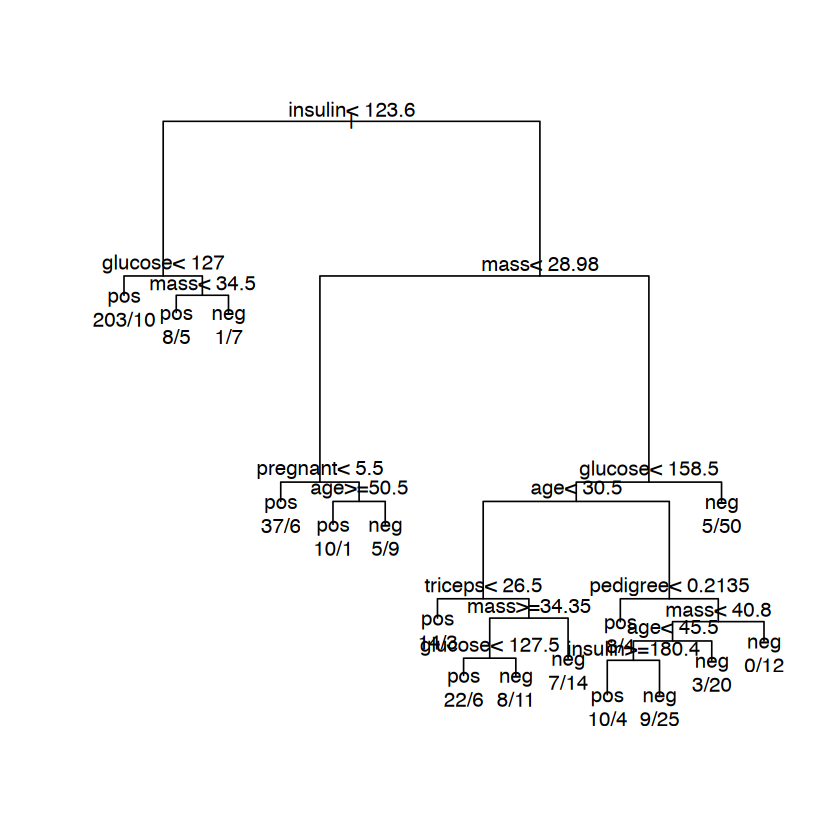

In [7]:
par(xpd = TRUE)
plot(treefit,compress = TRUE) # 1
text(treefit, use.n = TRUE) # 2

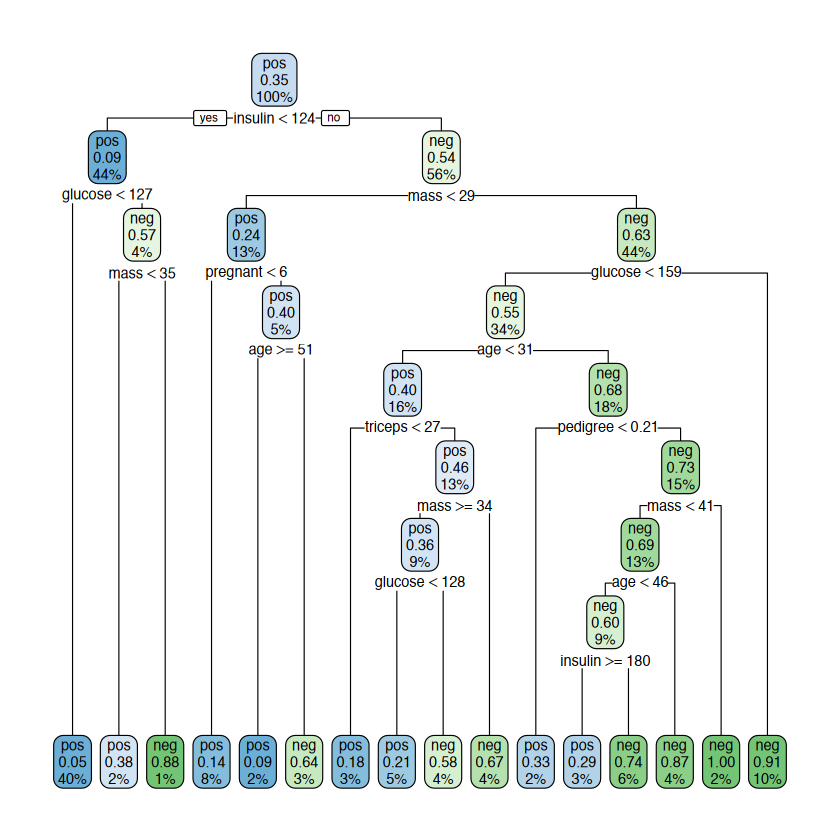

In [8]:
rpart.plot(treefit)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



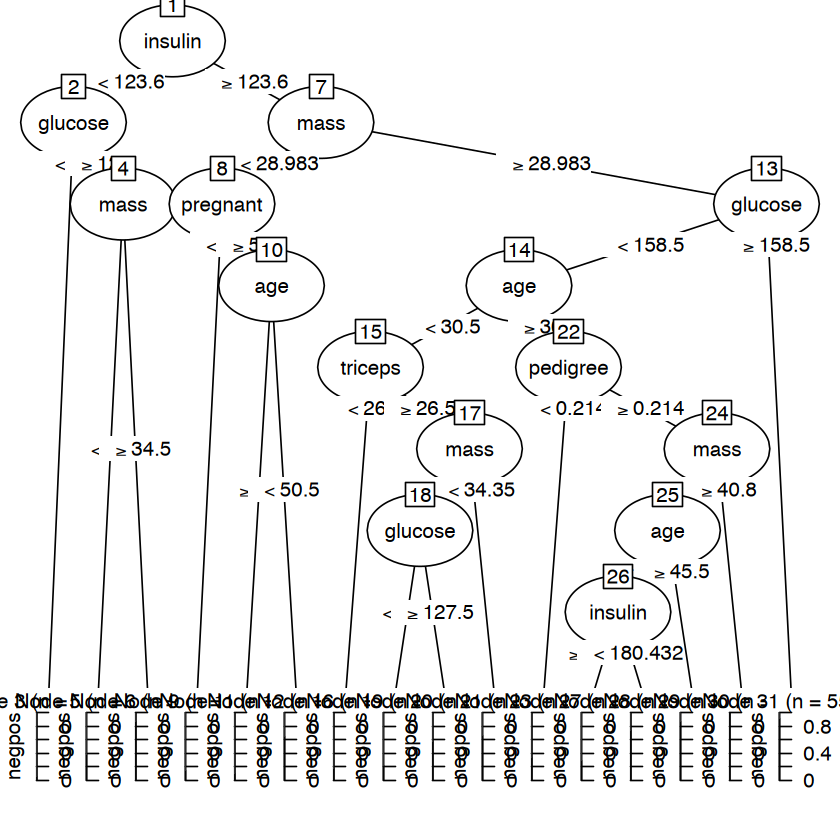

In [9]:
library(partykit)

plot(as.party(treefit))

# 超参数

In [10]:
set.seed(123)
treefit <- rpart(
  diabetes ~ .,
  data = train,
  control = rpart.control(
    minsplit = 20,      # 最小分支节点样本数
    # minbucket = 2,    # 分支后最小叶节点样本数（如需启用可取消注释）
    maxdepth = 30,      # 树的最大深度
    cp = 0.01,          # 复杂度参数
    xval = 10           # 交叉验证折数，默认10
  )
)
treefit

n= 537 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 537 187 pos (0.65176909 0.34823091)  
    2) insulin< 123.6 234  22 pos (0.90598291 0.09401709)  
      4) glucose< 127 213  10 pos (0.95305164 0.04694836) *
      5) glucose>=127 21   9 neg (0.42857143 0.57142857)  
       10) mass< 34.5 13   5 pos (0.61538462 0.38461538) *
       11) mass>=34.5 8   1 neg (0.12500000 0.87500000) *
    3) insulin>=123.6 303 138 neg (0.45544554 0.54455446)  
      6) mass< 28.983 68  16 pos (0.76470588 0.23529412)  
       12) pregnant< 5.5 43   6 pos (0.86046512 0.13953488) *
       13) pregnant>=5.5 25  10 pos (0.60000000 0.40000000)  
         26) age>=50.5 11   1 pos (0.90909091 0.09090909) *
         27) age< 50.5 14   5 neg (0.35714286 0.64285714) *
      7) mass>=28.983 235  86 neg (0.36595745 0.63404255)  
       14) glucose< 158.5 180  81 neg (0.45000000 0.55000000)  
         28) age< 30.5 85  34 pos (0.60000000 0.40000000)  
           56) triceps< 26.5 17 

In [11]:
pred <- predict(treefit, newdata = test, type = "class")

# 计算混淆矩阵
caret::confusionMatrix(test$diabetes, pred)

Confusion Matrix and Statistics

          Reference
Prediction pos neg
       pos 118  32
       neg  29  52
                                          
               Accuracy : 0.7359          
                 95% CI : (0.6741, 0.7916)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 0.0008336       
                                          
                  Kappa : 0.425           
                                          
 Mcnemar's Test P-Value : 0.7978939       
                                          
            Sensitivity : 0.8027          
            Specificity : 0.6190          
         Pos Pred Value : 0.7867          
         Neg Pred Value : 0.6420          
             Prevalence : 0.6364          
         Detection Rate : 0.5108          
   Detection Prevalence : 0.6494          
      Balanced Accuracy : 0.7109          
                                          
       'Positive' Class : pos             
                              

# 后剪枝

In [12]:
printcp(treefit)


Classification tree:
rpart(formula = diabetes ~ ., data = train, control = rpart.control(minsplit = 20, 
    maxdepth = 30, cp = 0.01, xval = 10))

Variables actually used in tree construction:
[1] age      glucose  insulin  mass     pedigree pregnant triceps 

Root node error: 187/537 = 0.34823

n= 537 

        CP nsplit rel error  xerror     xstd
1 0.168449      0   1.00000 1.00000 0.059037
2 0.045455      2   0.66310 0.82353 0.056044
3 0.021390      4   0.57219 0.70588 0.053356
4 0.018717      5   0.55080 0.73797 0.054150
5 0.016043      7   0.51337 0.75936 0.054653
6 0.010695     10   0.46524 0.76471 0.054776
7 0.010000     15   0.41176 0.77540 0.055017


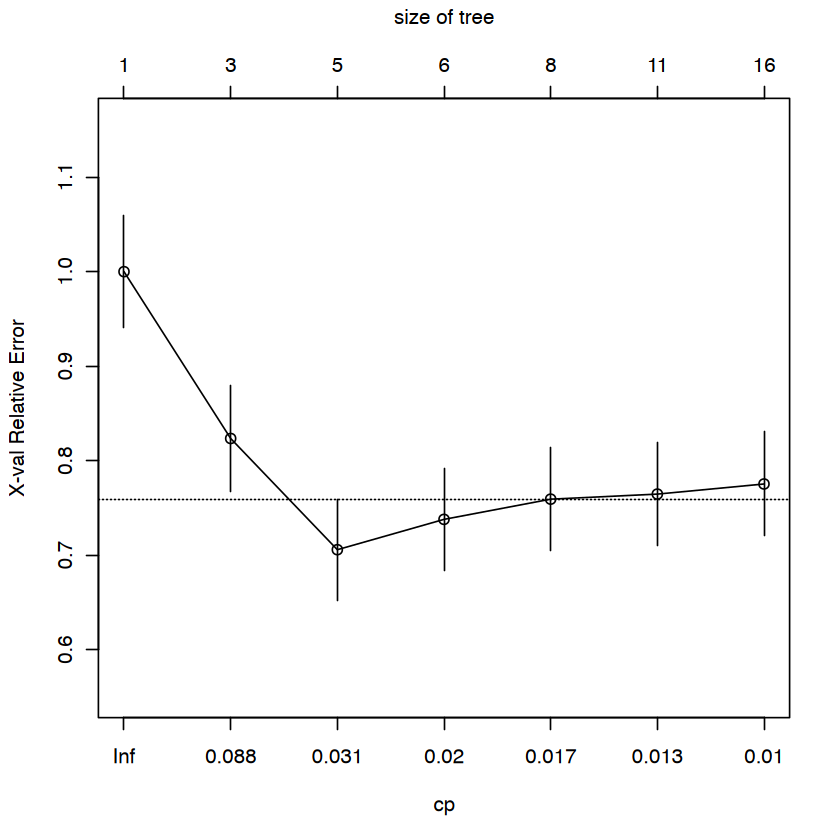

In [13]:
plotcp(treefit)

In [ ]:
cp <- treefit$cptable[which.min(treefit$cptable[, "xerror"]), "CP"]
cp

[1] 0.02139037

In [15]:
treepruned <- prune(treefit, cp = cp)
treepruned

n= 537 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 537 187 pos (0.65176909 0.34823091)  
   2) insulin< 123.6 234  22 pos (0.90598291 0.09401709) *
   3) insulin>=123.6 303 138 neg (0.45544554 0.54455446)  
     6) mass< 28.983 68  16 pos (0.76470588 0.23529412) *
     7) mass>=28.983 235  86 neg (0.36595745 0.63404255)  
      14) glucose< 158.5 180  81 neg (0.45000000 0.55000000)  
        28) age< 30.5 85  34 pos (0.60000000 0.40000000) *
        29) age>=30.5 95  30 neg (0.31578947 0.68421053) *
      15) glucose>=158.5 55   5 neg (0.09090909 0.90909091) *

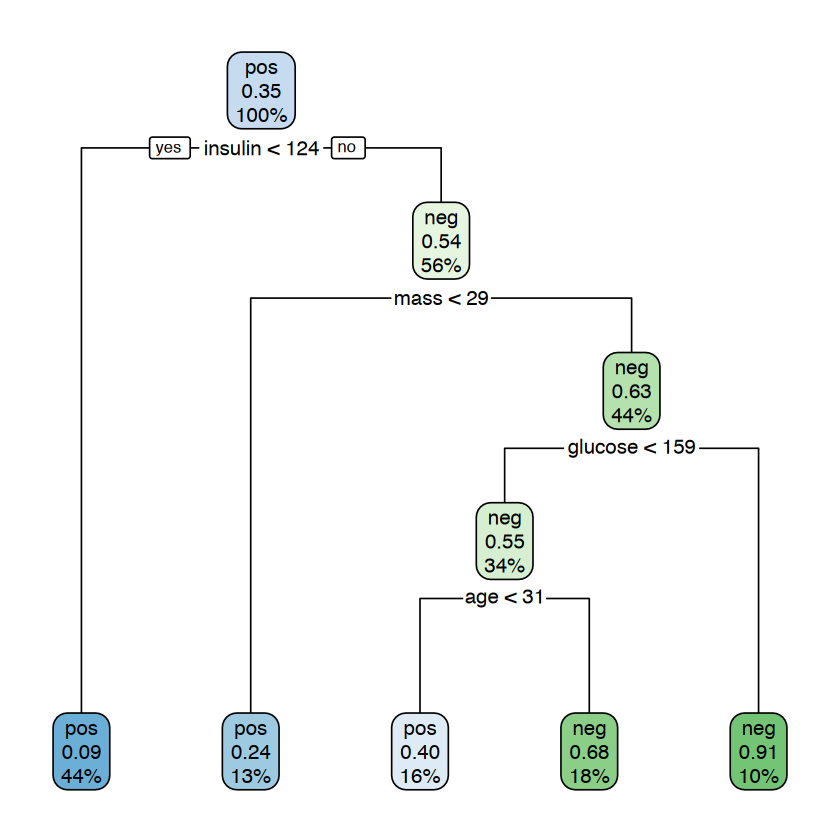

In [16]:
rpart.plot(treepruned)

In [17]:
pred2 <- predict(treepruned, newdata = test, type = "class")
caret::confusionMatrix(test$diabetes, pred2)

Confusion Matrix and Statistics

          Reference
Prediction pos neg
       pos 126  24
       neg  32  49
                                         
               Accuracy : 0.7576         
                 95% CI : (0.697, 0.8114)
    No Information Rate : 0.684          
    P-Value [Acc > NIR] : 0.008646       
                                         
                  Kappa : 0.4553         
                                         
 Mcnemar's Test P-Value : 0.349575       
                                         
            Sensitivity : 0.7975         
            Specificity : 0.6712         
         Pos Pred Value : 0.8400         
         Neg Pred Value : 0.6049         
             Prevalence : 0.6840         
         Detection Rate : 0.5455         
   Detection Prevalence : 0.6494         
      Balanced Accuracy : 0.7344         
                                         
       'Positive' Class : pos            
                                         

# 学习曲线

In [ ]:
res <- list()
for (i in 2:300) {
  set.seed(123)
  f <- rpart(
    diabetes ~ .,
    data = train,
    control = rpart.control(
      minsplit = i
    )
  )
  pred <- predict(f, newdata = test, type = "class")
  acc <- caret::confusionMatrix(test$diabetes, pred)[["overall"]][["Accuracy"]]
  df <- data.frame(minsplit = i, accuracy = acc)
  res[[i - 1]] <- df
}

acc.res <- do.call(rbind, res)

In [21]:
range(acc.res$accuracy)

[1] 0.6709957 0.7619048

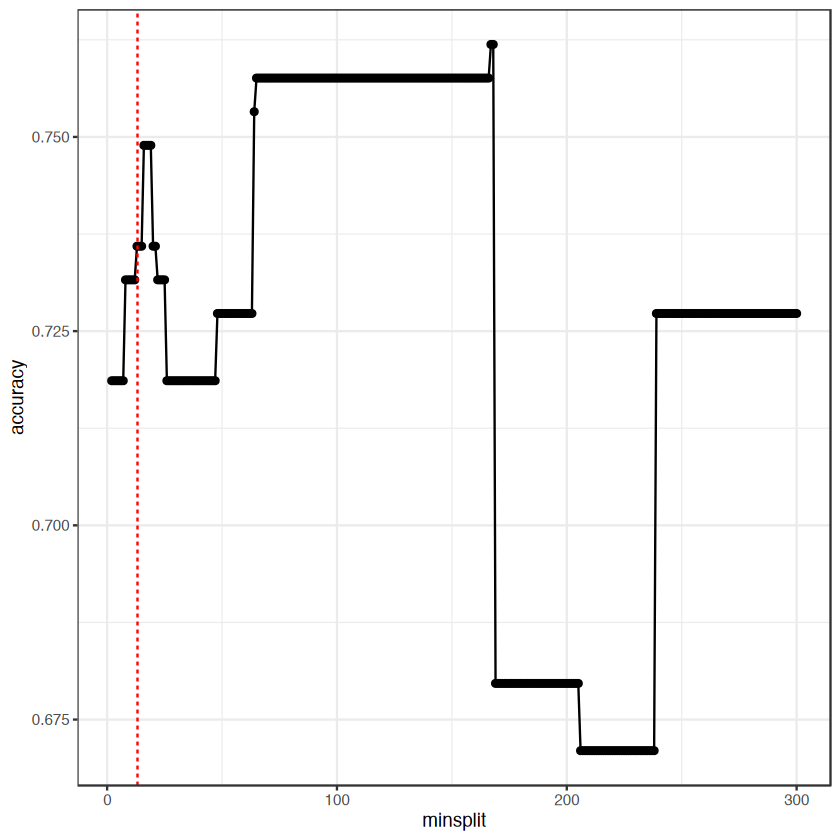

In [23]:
library(ggplot2)

# 绘制 minsplit 与 accuracy 的关系曲线
ggplot(acc.res, aes(x = minsplit, y = accuracy)) +
  geom_point() +
  geom_line() +
  geom_vline(xintercept = 13, linetype = 2, color = "red") +
  theme_bw()

In [ ]:
acc.res[which.max(acc.res$accuracy), ]

,minsplit,accuracy
,<int>,<dbl>
166,167,0.7619048


In [26]:
# 建立模型
set.seed(123)
treef <- rpart(
  diabetes ~ .,
  data = train,
  control = rpart.control(
    minsplit = 13 # 这里选择13
  )
)

# 测试集查看效果
pred <- predict(treef, newdata = test, type = "class")

# 测试集的混淆矩阵
caret::confusionMatrix(test$diabetes, pred)

Confusion Matrix and Statistics

          Reference
Prediction pos neg
       pos 119  31
       neg  30  51
                                          
               Accuracy : 0.7359          
                 95% CI : (0.6741, 0.7916)
    No Information Rate : 0.645           
    P-Value [Acc > NIR] : 0.002016        
                                          
                  Kappa : 0.4218          
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.7987          
            Specificity : 0.6220          
         Pos Pred Value : 0.7933          
         Neg Pred Value : 0.6296          
             Prevalence : 0.6450          
         Detection Rate : 0.5152          
   Detection Prevalence : 0.6494          
      Balanced Accuracy : 0.7103          
                                          
       'Positive' Class : pos             
                              

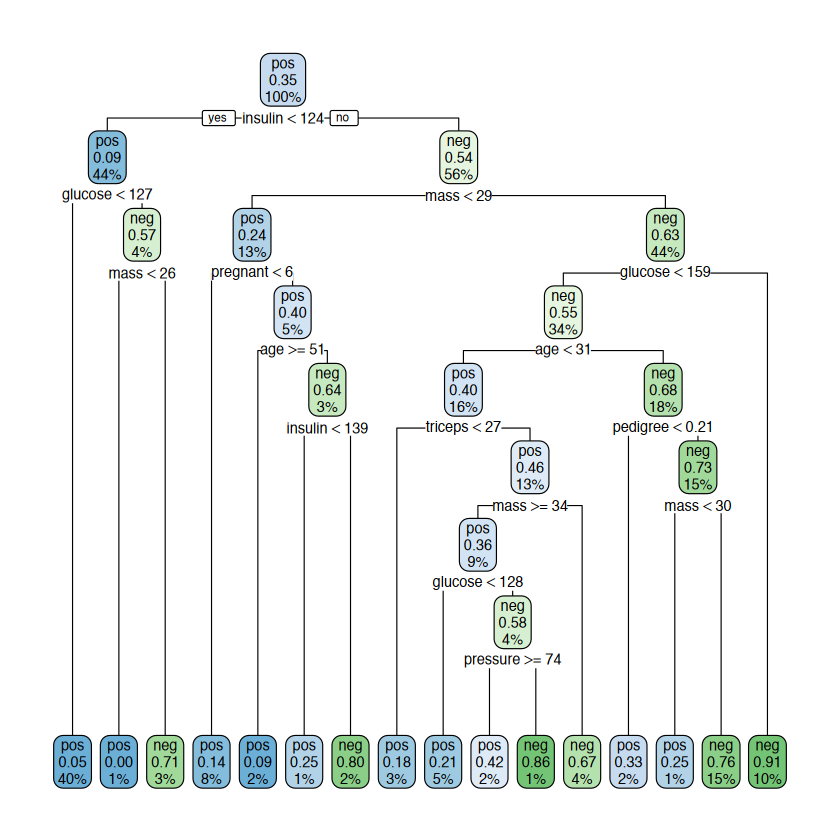

In [27]:
rpart.plot(treef)

# 网格搜索

In [28]:
library(e1071)

# 默认10折交叉验证
set.seed(456)
tune_obj <- tune.rpart(
  diabetes ~ .,
  data = train,
  minsplit = seq(10, 120, 5),
  cp = c(0.0001, 0.001, 0.01, 0.1, 1)
)

tune_obj


Parameter tuning of 'rpart.wrapper':

- sampling method: 10-fold cross validation 

- best parameters:
 minsplit    cp
       95 1e-04

- best performance: 0.2325996 


In [29]:
rpart_fit <- rpart(
  diabetes ~ .,
  data = train,
  control = rpart.control(
    minsplit = 100,
    cp = 0.0001,
    xval = 10
  )
)
rpart_fit

n= 537 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 537 187 pos (0.65176909 0.34823091)  
   2) insulin< 123.6 234  22 pos (0.90598291 0.09401709) *
   3) insulin>=123.6 303 138 neg (0.45544554 0.54455446)  
     6) mass< 28.983 68  16 pos (0.76470588 0.23529412) *
     7) mass>=28.983 235  86 neg (0.36595745 0.63404255)  
      14) glucose< 158.5 180  81 neg (0.45000000 0.55000000)  
        28) age< 30.5 85  34 pos (0.60000000 0.40000000) *
        29) age>=30.5 95  30 neg (0.31578947 0.68421053) *
      15) glucose>=158.5 55   5 neg (0.09090909 0.90909091) *

In [30]:
pred <- predict(rpart_fit, newdata = test, type = "class")

# 计算混淆矩阵
caret::confusionMatrix(test$diabetes, pred)

Confusion Matrix and Statistics

          Reference
Prediction pos neg
       pos 126  24
       neg  32  49
                                         
               Accuracy : 0.7576         
                 95% CI : (0.697, 0.8114)
    No Information Rate : 0.684          
    P-Value [Acc > NIR] : 0.008646       
                                         
                  Kappa : 0.4553         
                                         
 Mcnemar's Test P-Value : 0.349575       
                                         
            Sensitivity : 0.7975         
            Specificity : 0.6712         
         Pos Pred Value : 0.8400         
         Neg Pred Value : 0.6049         
             Prevalence : 0.6840         
         Detection Rate : 0.5455         
   Detection Prevalence : 0.6494         
      Balanced Accuracy : 0.7344         
                                         
       'Positive' Class : pos            
                                         

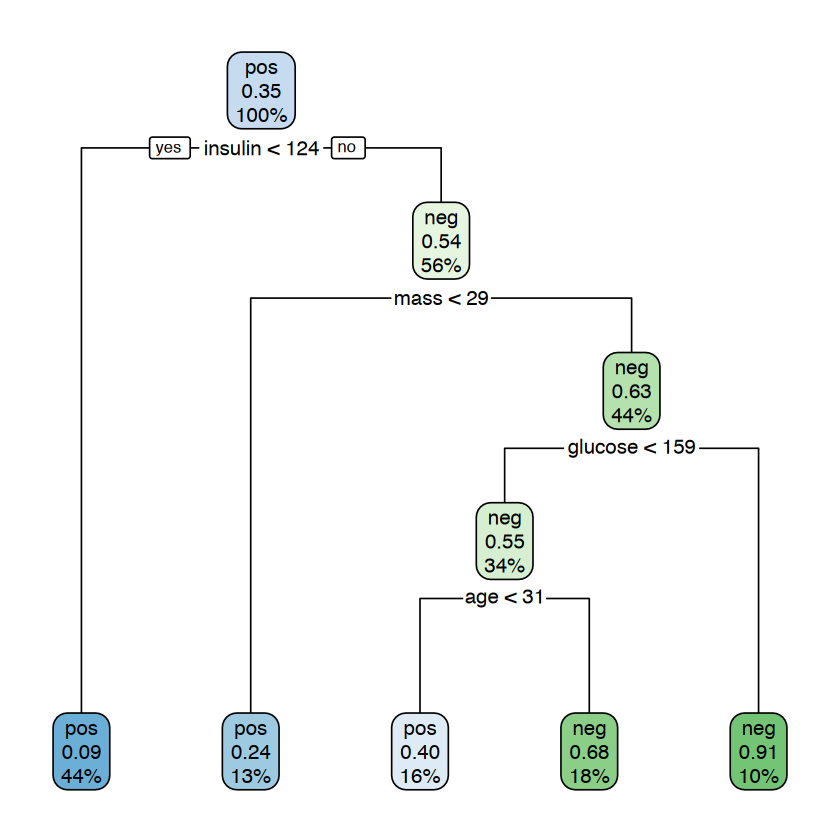

In [31]:
rpart.plot(rpart_fit)

# 决策树可视化

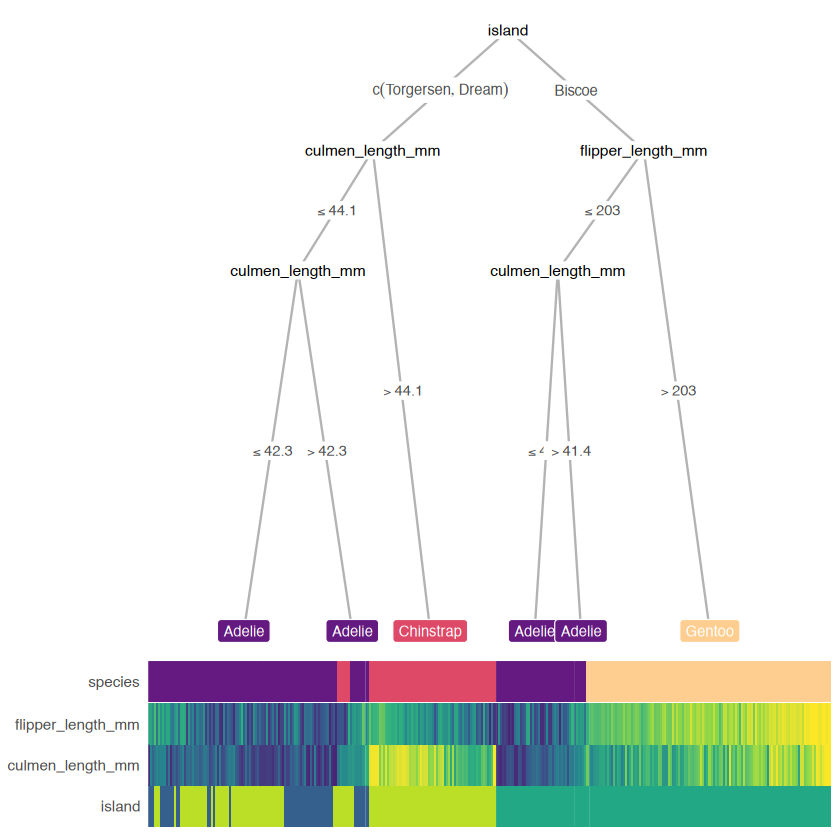

In [33]:
library(treeheatr)

heat_tree(penguins, target_lab = "species")

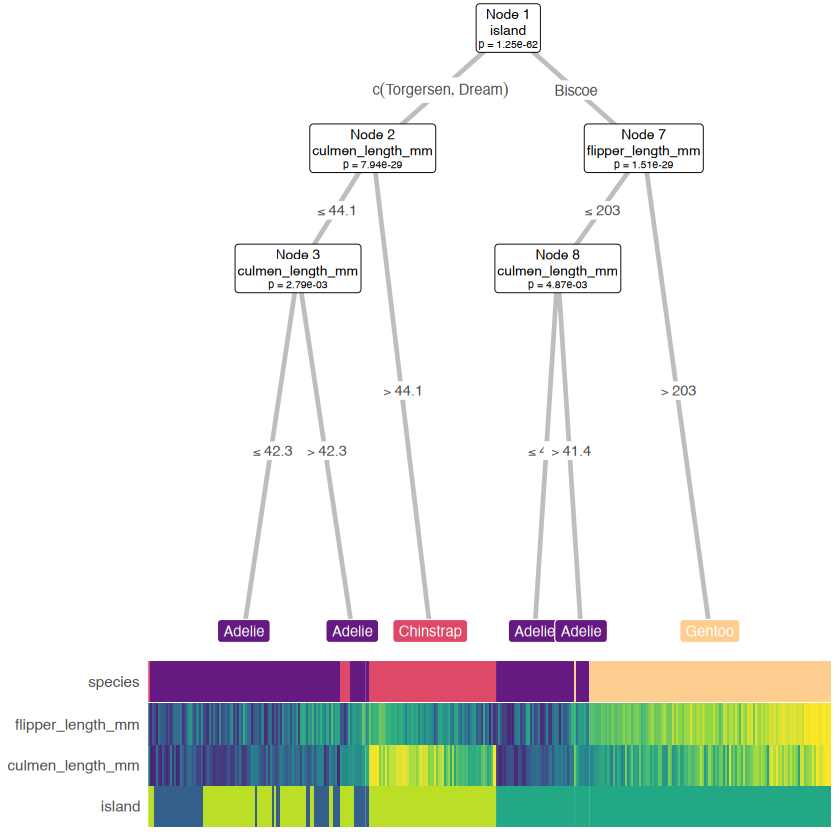

In [34]:
heat_tree(
  penguins,
  target_lab = "species",
  par_node_vars = list(
    label.size = 0.2,
    label.padding = ggplot2::unit(0.1, "lines"),
    line_list = list(
      ggplot2::aes(label = paste("Node", id)),
      ggplot2::aes(label = splitvar),
      ggplot2::aes(label = paste("p =", formatC(p.value, format = "e", digits = 2)))
    ),
    line_gpar = list(
      list(size = 8),
      list(size = 8),
      list(size = 6)
    ),
    id = "inner"
  ),
  # terminal_vars = list(size = 0),
  # cont_legend = TRUE, cate_legend = TRUE,
  edge_vars = list(size = 1, color = "grey")
)

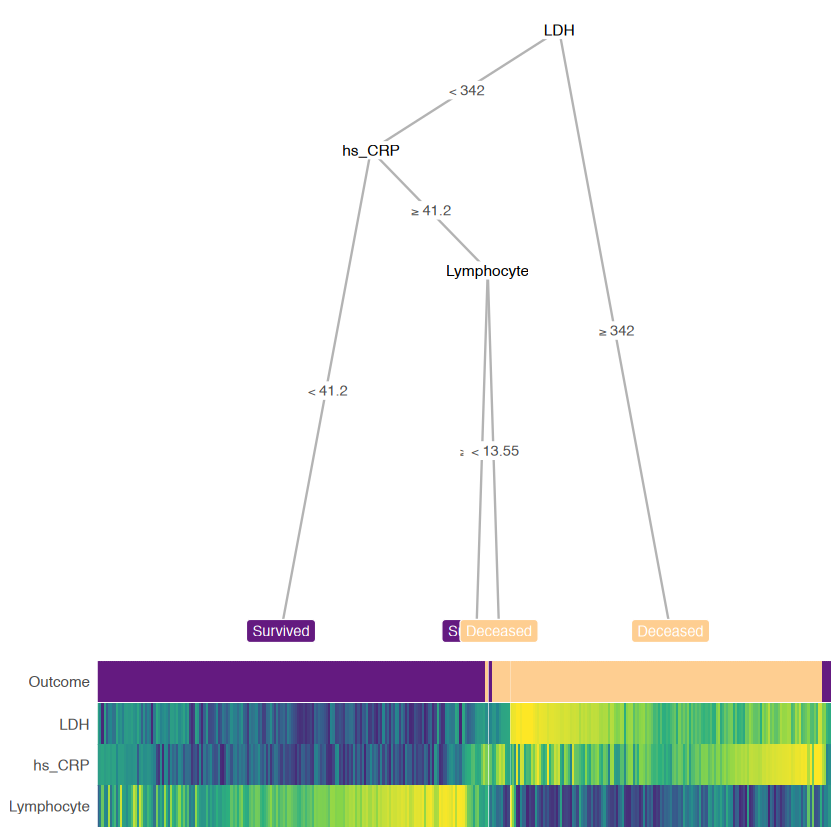

In [35]:
# build tree using rpart:
x <- partykit::as.party(rpart::rpart(Outcome ~ ., data = train_covid))

heat_tree(x = x, label_map = c(`1` = 'Deceased', `0` = 'Survived'))

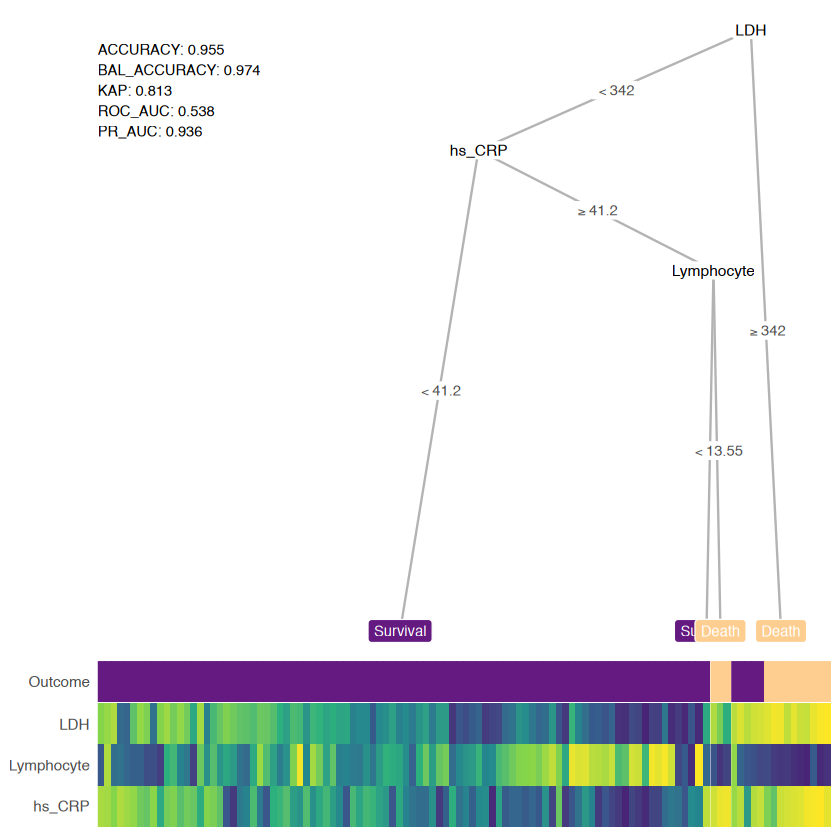

In [36]:
heat_tree(
  x = x,
  data_test = test_covid, # 测试集
  target_lab = 'Outcome',
  label_map = c(`1` = 'Death', `0` = 'Survival'),
  lev_fac = 3)